In [1]:
from dataloader_class import *

In [2]:
dl = data_loader('data/covid2020.csv')

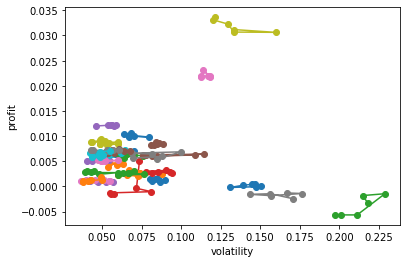

In [3]:
dl.split_windows(60)
dl.plot_trajectories()

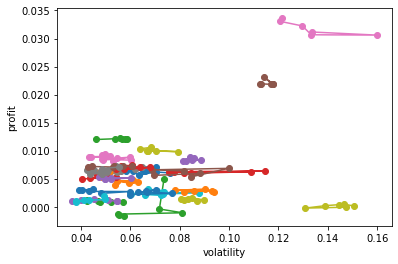

In [4]:
dl.filter_assets(method='relevant')
dl.plot_trajectories()

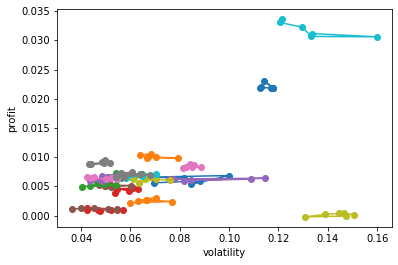

In [5]:
dl.filter_assets(num_assets=20,method='random')
dl.plot_trajectories()

In [6]:
mut = dl.return_mut()
mut.shape

(6, 3)

In [7]:
sigmat = dl.return_sigmat()
sigmat.shape

(6, 3, 3)

In [8]:
stdt = dl.return_stdt()
stdt.shape

(6, 3)